In [2]:
# import needed python libraries

%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random

In [3]:
# load dataset
ddos_data = pd.read_csv("ddos_dataset.csv", sep=",")
ddos_data.rename(columns=lambda x: x.strip(), inplace=True)
columns = ddos_data.columns

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
ddos_data['label_bin']=1
ddos_data.loc[ddos_data['label']=='benign','label_b']=0

 **1) Investigate the provided dataset**

*Caratteristiche scoperte:*
* Il Flow ID è la combinazione di: source IP - destination ip - source port - destination port - protocol
* Alcuni Flow ID non rispettano la regola, perchè ? Errore nel dataset o errore di comprensione? 

 ***Domanda***: Un flow è unico o può essere ripetuto ?

In [17]:
 ddos_data["Flow ID"].value_counts()

172.16.0.5-192.168.50.1-0-0-0             18
192.168.50.253-224.0.0.5-0-0-0            14
192.168.50.254-224.0.0.5-0-0-0            14
8.0.6.4-8.6.0.1-0-0-0                     12
172.16.0.5-192.168.50.1-9553-22-6          9
                                          ..
172.16.0.5-192.168.50.1-36404-21981-17     1
172.16.0.5-192.168.50.1-36405-46365-17     1
172.16.0.5-192.168.50.1-61850-24027-17     1
172.16.0.5-192.168.50.1-61850-6932-17      1
172.16.0.5-192.168.50.1-45602-1387-17      1
Name: Flow ID, Length: 60958, dtype: int64

 ***Risposta***: No, un flow può comparire più volte

 ***Ipotesi momentanea***: Il flow è dato dal raggruppamento di source IP - destination ip - source port - destination port - protocol

In [24]:
ddos_data.groupby(["Source IP","Source Port","Destination IP","Destination Port","Protocol"]).size().sort_values(ascending=False)

 **2) Produce different visualizations and statistical analysis both at the generic traffic level
(e.g., number of flows, etc.) and GT level. (e.g., distribution of features, GT class
characterization, ECDF of ports, flows, etc.)**

<AxesSubplot:>

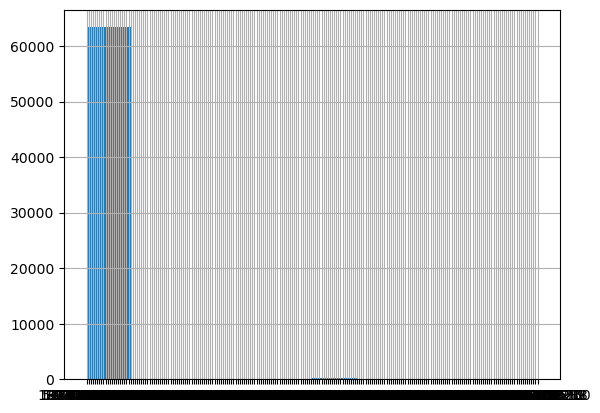

In [9]:
# Quantificare il numero di flow

df = ddos_data.loc[:,:]
df["Source IP"].hist()

In [ ]:
df_iris['sepal_length'].hist()


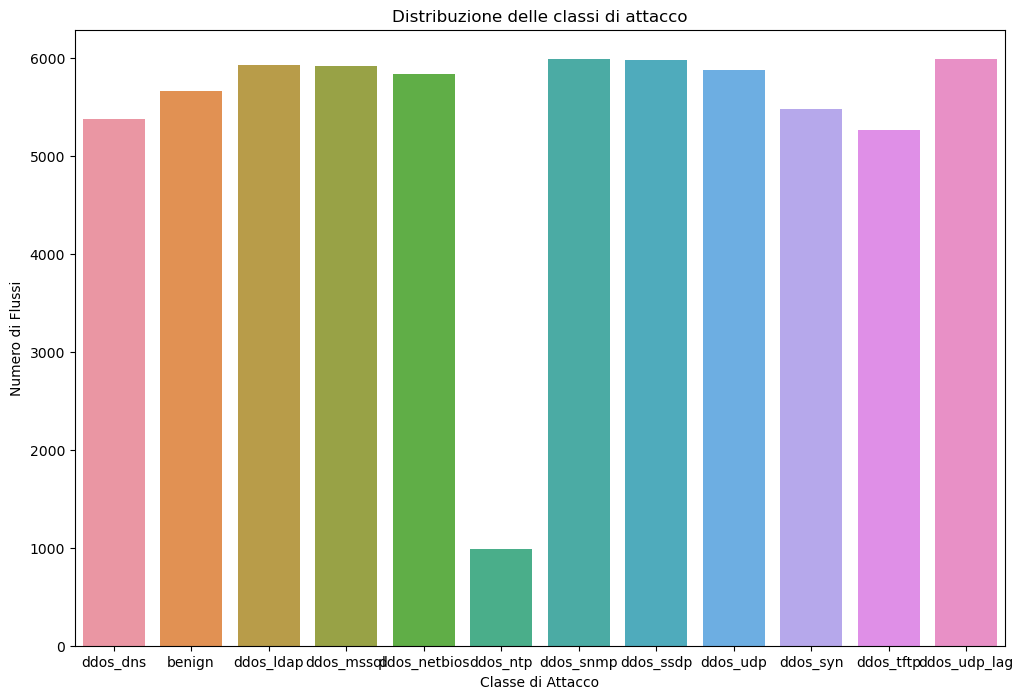

In [10]:
# Visualizzazione 1: numero di flussi per ogni classe di attacco
plt.figure(figsize=(12,8))
sns.countplot(x="label", data=df)
plt.title("Distribuzione delle classi di attacco")
plt.xlabel("Classe di Attacco")
plt.ylabel("Numero di Flussi")
plt.show()


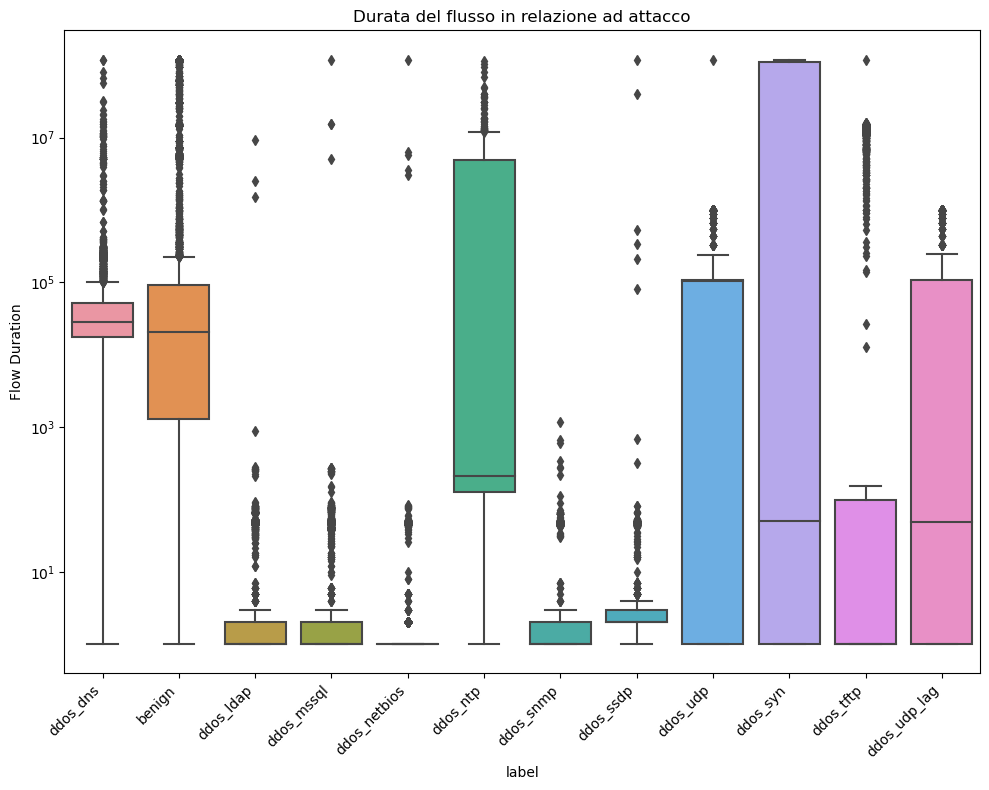

In [14]:
# Durata del flusso in relazione all'attacco
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=df, x='label', y='Flow Duration')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Ruota le etichette
ax.set_yscale('log')  # Imposta la scala logaritmica sull'asse delle y
ax.set_title('Durata del flusso in relazione ad attacco')
plt.tight_layout()  # Assicurati che nulla venga tagliato
plt.show()

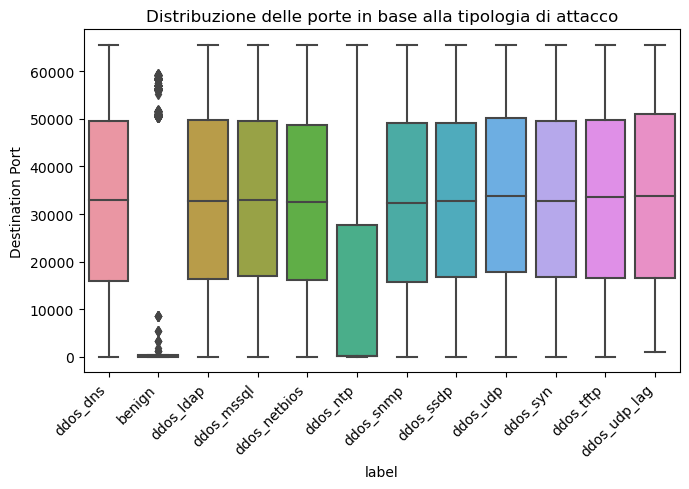

In [42]:
# Distribuzione delle porte in base all'attacco
plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=ddos_data, x='label', y='Destination Port')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title('Distribuzione delle porte in base alla tipologia di attacco')
plt.tight_layout()
plt.show()

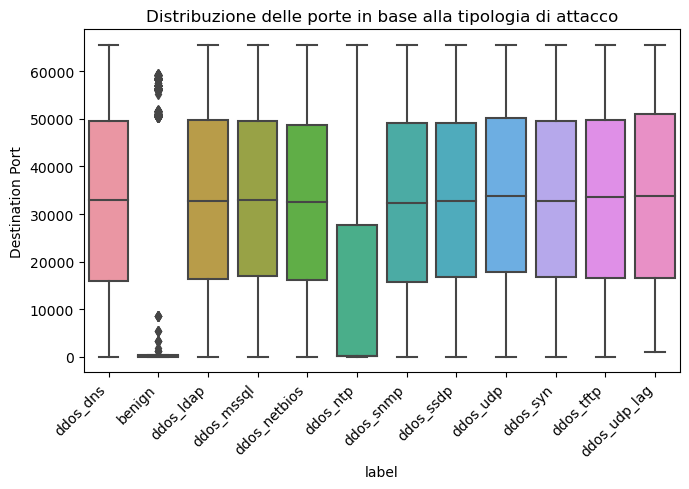

In [42]:
# Lunghezza dei pacchetti in base all'attacco
plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=ddos_data, x='label', y='Destination Port')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title('Distribuzione delle porte in base alla tipologia di attacco')
plt.tight_layout()
plt.show()

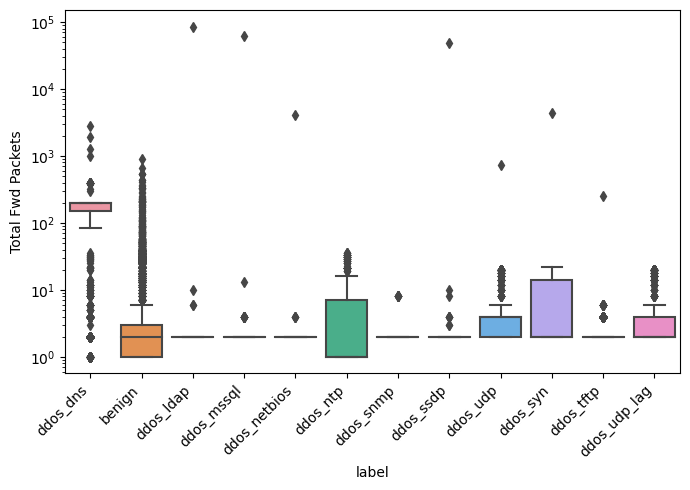

In [66]:
plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=ddos_data, x='label', y='Total Fwd Packets')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yscale('log',base=10)
plt.tight_layout()
plt.show()

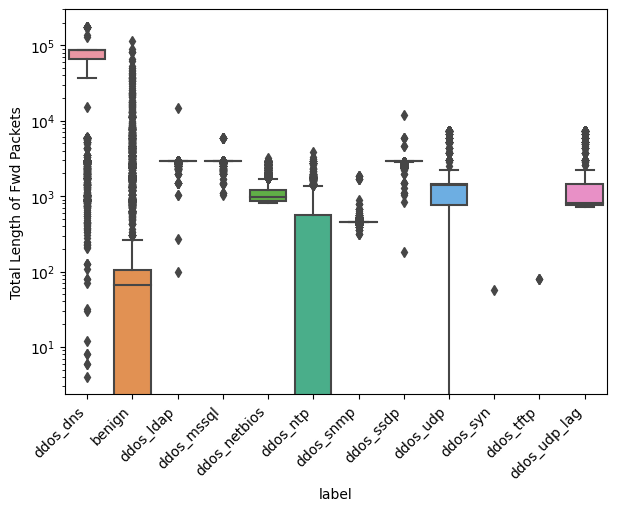

In [67]:
plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=df, x='label', y='Total Length of Fwd Packets')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yscale('log',base=10)
plt.tight_layout()
plt.show()

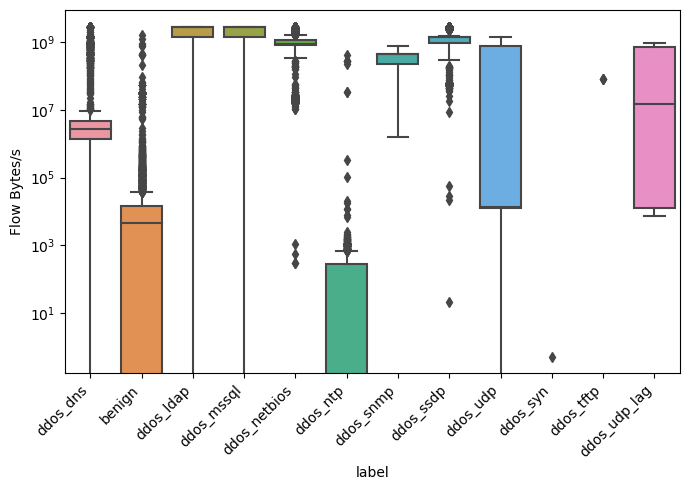

In [72]:
plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=df, x='label', y='Flow Bytes/s')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yscale('log',base=10)
plt.tight_layout()
plt.show()

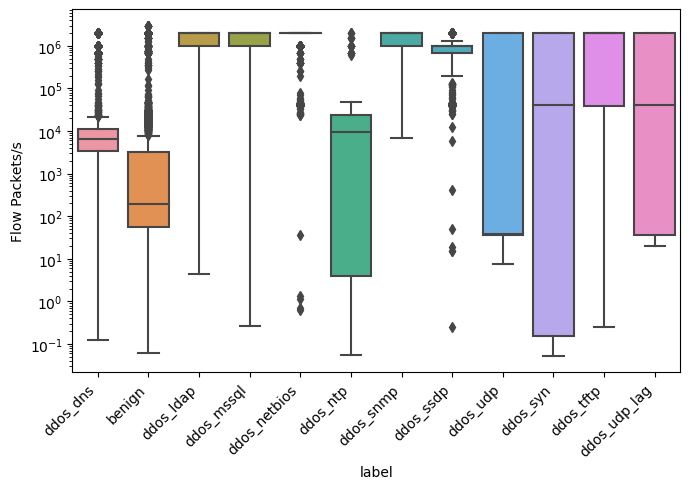

In [70]:
plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=df, x='label', y='Flow Packets/s')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yscale('log',base=10)
plt.tight_layout()
plt.show()

Prime conclusioni tratte, molte features hanno già media, deviazione, minimo e massimo, dobbiamo aggiungere poche features
